# Micro-level data for the narchiver

_Nick Janetos_

_January 9th, 2016_

This document containts scratch work on viewing micro-level data in the narchiver.

In [54]:
# Load all the data
exec(open("load_data.py").read())
%matplotlib inline

This script loads a particular vendor, and displays all the information available about that vendor.

In [55]:
vendor_id    = 500
vendor_name  = vendors[vendor_id][0]
listings_all = listings[listings['VENDOR'] == vendor_id]
reviews_all  = reviews[reviews['VENDOR'] == vendor_id]
prices_all   = prices[prices['VENDOR'] == vendor_id]
num_listings = len(listings_all)
num_reviews  = len(reviews_all)

## Vendor: {{vendor_name}}

### General info

1. Id: {{vendor_id}}
2. Total listings: {{num_listings}}
3. Total reviews: {{num_reviews}}

### Price history, by listing

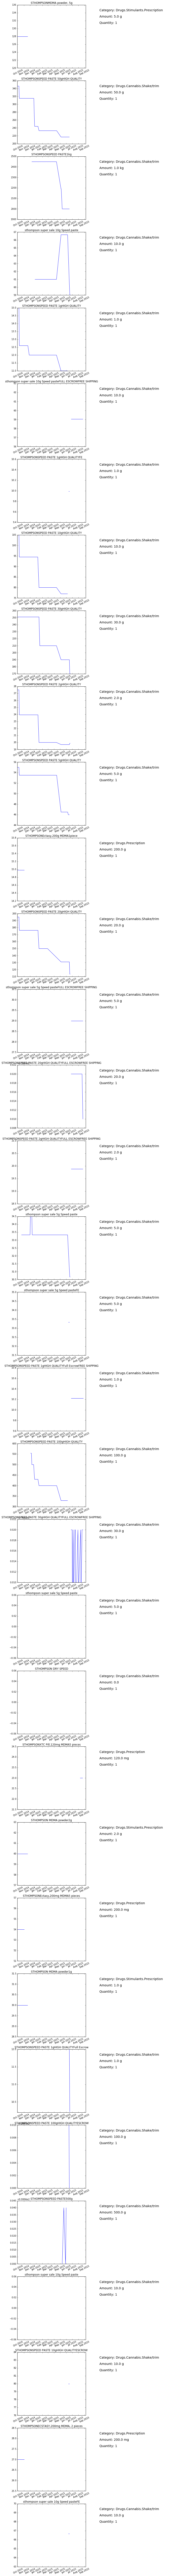

In [56]:
fig, axes = plt.subplots(nrows = num_listings, ncols = 2, figsize = (12, num_listings*6))

i = 0
for l_id in listings_all['ID']:
    listing = listings_all[listings_all['ID'] == l_id]
    p_temp = prices_all[prices_all['LISTING'] == l_id]
    vals   = [around(p, decimals = 2) for p in p_temp['PRICE']]
    dates  = p_temp['DATE']*86400
    dates  = [datetime.datetime.fromtimestamp(d) for d in dates]
    
    axes[i, 0].plot(dates, vals)
    axes[i, 0].fmt_xdata = mdates.DateFormatter('%m-%d')
    axes[i, 0].set_title(listing.iloc[0][1])
    plt.setp(axes[i, 0].xaxis.get_majorticklabels(), rotation=25)
    axes[i, 0].set_xlim(min_date, max_date)
    
    axes[i, 1].axis('off')
    axes[i, 1].text(0, 0.9, 'Category: ' + categories[listing.iloc[0][2]][0], size = 14)
    axes[i, 1].text(0, 0.8, 'Amount: ' + str(listing.iloc[0][5]) + ' ' + str(listing.iloc[0][4]), size = 14)
    axes[i, 1].text(0, 0.7, 'Quantity: ' + str(listing.iloc[0][6]), size = 14)
    i = i + 1